In [31]:
#import library
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
#upload data ke google colab
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [4]:
#load data
df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
#mengubah tipe data dari float menjadi int untuk kolom rooms, bedrooms dan age house
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].astype('int')
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype('int')
df['Avg. Area House Age'] = df['Avg. Area House Age'].astype('int')

In [6]:
#Data Preparation
#menampilkan informasi dan missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   int64  
 2   Avg. Area Number of Rooms     5000 non-null   int64  
 3   Avg. Area Number of Bedrooms  5000 non-null   int64  
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 273.6+ KB


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
#menampilkan deskripsi statistik
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.481000,6.492200,3.732400,36163.516039,1.232073e+06
std,10657.991214,1.034144,1.048503,1.225843,9925.650114,3.531176e+05
min,17796.631190,2.000000,3.000000,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.000000,6.000000,3.000000,29403.928702,9.975771e+05
50%,68804.286404,5.000000,7.000000,4.000000,36199.406689,1.232669e+06
75%,75783.338666,6.000000,7.000000,4.000000,42861.290769,1.471210e+06
max,107701.748378,9.000000,10.000000,6.000000,69621.713378,2.469066e+06


In [8]:
#split dataset
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#modelling
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([1392537.2903549 , 1106705.01109054, 1169265.14621887, ...,
       1337472.08515169, 1601482.766859  , 1055548.67577611])

In [13]:
print("Predicted Values:")
print(y_pred)
print("Actual Values")
print(y_test.values)

Predicted Values:
[1392537.2903549  1106705.01109054 1169265.14621887 ... 1337472.08515169
 1601482.766859   1055548.67577611]
Actual Values
[1339096.07724513 1251794.17883686 1340094.96620542 ... 1472887.24706053
 1409762.1194903  1009606.28363319]


In [20]:
#evaluasi
model.score(X_test, y_test)

0.7022831311357589

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35133664197.21461
R-squared: 0.7022831311357589


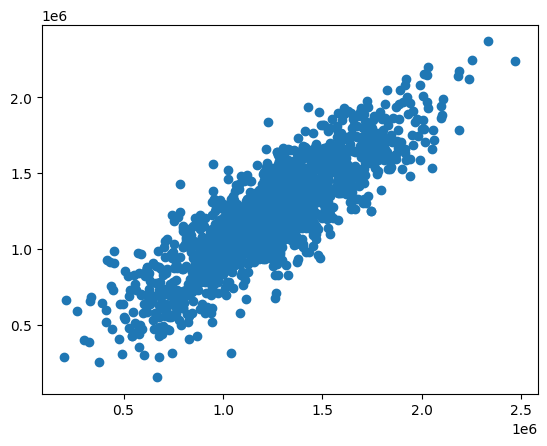

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(y_test, y_pred)

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
prediction = forest_model.predict(X_test)
prediction

array([1362481.63906535, 1167848.64606678, 1224790.78296548, ...,
       1341358.5485469 , 1405984.19610616, 1091671.45988251])

In [29]:
#evaluasi
forest_model.score(X_test, y_test)

0.8387876338964388

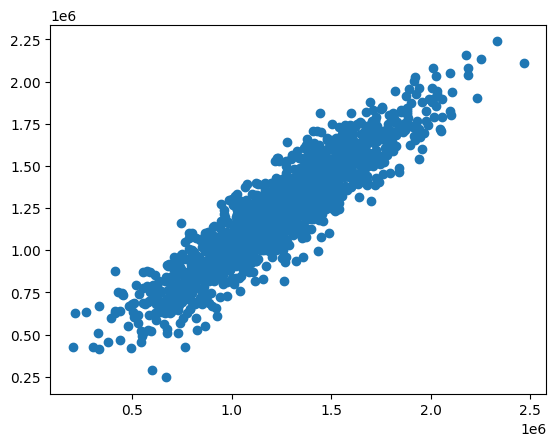

In [30]:
plt.scatter(y_test, prediction)